In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm
import sklearn.cross_validation

from matplotlib import colors
import pylab as pl

import scipy.stats as stats

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [305]:
df = pd.read_csv("nj_teachers_salaries_2016 copy.csv")

In [306]:
df.head()

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
0,Heckman,William,Atlantic,Atlantic City,Pennsylvania Ave School,Mathematics Grades 5 - 8,1.0,98774,Standard certificate,General ed,Traditional,Not highly qualified,13.0,13.0,13.0
1,Bird,Kelly,Atlantic,Atlantic City,Atlantic City High School,Coordinator Substance Abuse,1.0,118415,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,16.0,16.0,16.0
2,Bean,David B,Atlantic,Atlantic City,Atlantic City High School,Health & Physical Education,0.8,98774,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,13.0,13.0,15.0
3,Campo,Paula Mia,Atlantic,Atlantic City,Atlantic City High School,Resource Program In-class,1.0,66184,Standard certificate,Special ed,Alternate,Doesn't need to be highly qualified,16.0,16.0,16.0
4,Adams-meyer,Della L,Atlantic,Atlantic City,Atlantic City High School,School Psychologist,1.0,101866,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,12.0,12.0,12.0


In [307]:
df.shape

(138715, 15)

In [308]:
#pd.unique(df['experience_total'])



## Data Cleansing and Filtering



In [309]:
df = df.loc[df['subcategory'].isin(['Special ed'])]

In [310]:
df = df.loc[df['primary_job'].isin(['Elementary School Teacher K-5'])]

In [311]:
df = df.loc[df['county'].isin(['Bergen'])]

In [312]:
salary_data = df.fillna(0)
salary_data.head(8)

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
4768,Cavotto,Suzanne,Bergen,Bergen Co Special Service,Autistic,Elementary School Teacher K-5,1.0,71469,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,13.0,13.0,13.0
4851,Keren,Deena,Bergen,Bergen Co Special Service,Autistic,Elementary School Teacher K-5,1.0,72981,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,9.0,11.0,11.0
4885,Vonende,Nancy B,Bergen,Bergen Co Special Service,Multiply Handicaped,Elementary School Teacher K-5,1.0,81606,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,15.0,15.0,15.0
5451,Nagurka,Chelsea,Bergen,Bogota Boro,E. Roy Bixby,Elementary School Teacher K-5,1.0,49376,Provisional,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,2.0,2.0,2.0
5475,Jones,Kelly,Bergen,Bogota Boro,Lillian M. Steen,Elementary School Teacher K-5,1.0,50386,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,3.0,3.0,3.0
6127,Sculco,Carly E,Bergen,Cliffside Park Boro,School #4,Elementary School Teacher K-5,1.0,51950,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,4.0,4.0,4.0
6159,Luderer,Benjamin R,Bergen,Cliffside Park Boro,School #6,Elementary School Teacher K-5,1.0,50350,CEAS,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,3.0,3.0,3.0
6162,Ariemma,Alyssa B,Bergen,Cliffside Park Boro,School #6,Elementary School Teacher K-5,1.0,24400,CE,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,0.0,0.0,0.0


In [313]:
salary_data.shape

(187, 15)

## Prepare data for Salary Vs Experience

In [314]:
columns = ['last_name', 'first_name', 'county', 'district', 'school','primary_job', 'fte', 
       'certificate', 'subcategory','teaching_route', 'highly_qualified', 'experience_district',
       'experience_nj']
#remove white spaces in columns names:
salary_data.columns = salary_data.columns.str.strip()

#drop unwated columns:
salary_data.drop(columns, inplace=True, axis=1)
salary_data = salary_data[['experience_total','salary']]
salary_data.head()



,experience_total,salary
4768,13.0,71469
4851,11.0,72981
4885,15.0,81606
5451,2.0,49376
5475,3.0,50386


In [315]:

y = salary_data.iloc[:, -1].values
X = salary_data.iloc[:, :-1].values
#print(y) --salary


In [316]:
from sklearn.cross_validation import train_test_split



### Splitting into train and test 


In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 1)
(38, 1)
(149,)
(38,)


In [318]:
from sklearn.linear_model import LinearRegression, Ridge

### Applying Linear Regression

In [319]:
lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
pred_1 = lRegressor.predict(X_test)


In [321]:
#print("R^2 score for Linear Regression: ", lRegressor.score(X_test, y_test))

## Scatter Plot - Salary vs Experience

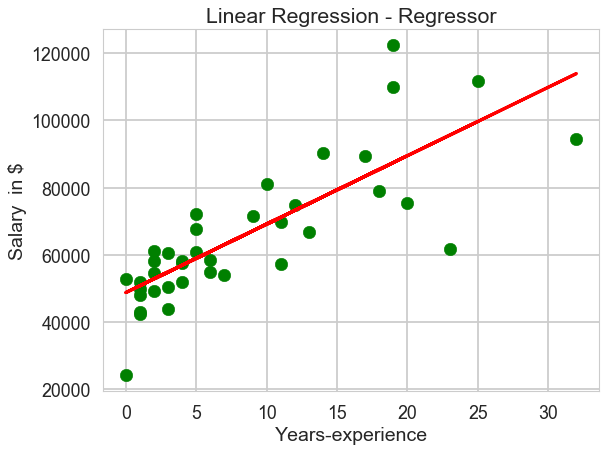

In [322]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test, y_test, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_test, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()


### Calculate Coefficients, Mean Squared error and Variance score - Salary vs Experience

In [323]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: ', lRegressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred_1))
  

Coefficients:  [2034.2927237]
Mean squared error: 150394682.98
Variance score: 0.63


### Dist plotting

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


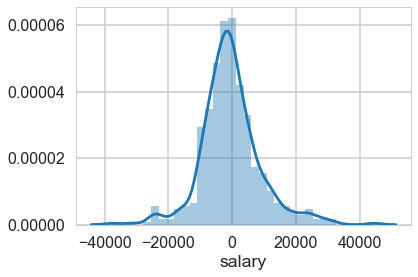

In [324]:
sns.distplot((Y_test1-Y_pred_sal))



## Data Pre-processing for  Salary vs District

In [325]:


### For Filtering by District in a County

#df = df.loc[df['county'].isin(['Bergen'])]

exp_dis_data = df

rem_columns = ['last_name', 'first_name', 'county','school','primary_job', 'fte', 
       'certificate', 'subcategory','teaching_route', 'highly_qualified', 'experience_district',
       'experience_nj']
#remove white spaces in columns names:
exp_dis_data.columns = exp_dis_data.columns.str.strip()

#drop unwated columns:
exp_dis_data.drop(rem_columns, inplace=True, axis=1)
exp_dis_data = exp_dis_data[['salary','district','experience_total']]
exp_dis_data.head()

exp_dis_data.district = pd.Categorical(exp_dis_data.district)
exp_dis_data['district_code'] = exp_dis_data.district.cat.codes
exp_dis_data.head()



col=['district']
dis_exp = exp_dis_data
dis_exp.drop(col,inplace=True,axis=1)
dis_exp = dis_exp[['district_code','experience_total','salary']]

dis_exp.head()

col=['experience_total']
district_data = exp_dis_data
district_data.drop(col,inplace=True,axis=1)
district_data.head()


from sklearn.linear_model import LinearRegression

dis_x = district_data.drop('salary', axis = 1)
dis_y = district_data['salary']
#print(dis_y)

from sklearn.cross_validation import train_test_split

X_dis_train, X_dis_test, y_dis_train, y_dis_test = train_test_split(dis_x, dis_y, test_size = 0.2)
# print(X_dis_train.shape)
# print(X_dis_test.shape)
# print(y_dis_train.shape)
# print(y_dis_test.shape)

lRegressor_dis = LinearRegression()
lRegressor_dis.fit(X_dis_train, y_dis_train)

pred_dis = lRegressor_dis.predict(X_dis_test)





## Scatter Plot - Predict Salary using District

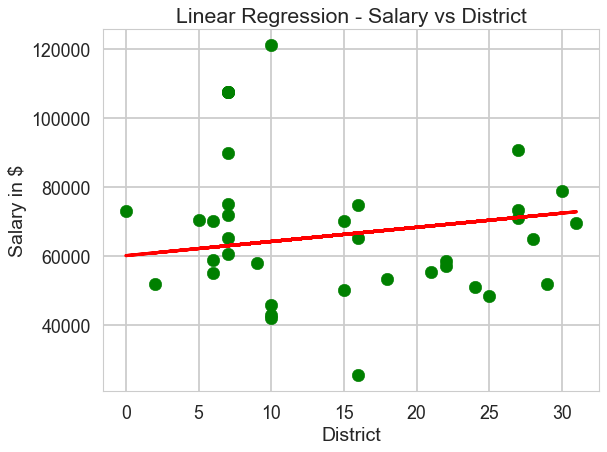

In [326]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_dis_test, y_dis_test, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_dis_test, pred_dis, c='r')
plt.title("Linear Regression - Salary vs District")
plt.xlabel("District")
plt.ylabel("Salary in $")
plt.show()

### Calculate Coefficients, Mean Squared error and Variance score - Salary Vs District

In [327]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: ', lRegressor_dis.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_dis_test, pred_dis))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_dis_test, pred_dis))
#print("R^2 score for Linear Regression: ", lRegressor_dis.score(y_dis_test, pred_dis))

Coefficients:  [410.08670548]
Mean squared error: 481250461.50
Variance score: -0.11


## Prepare data for Predicting Salary using Experience & District

In [328]:
from sklearn.linear_model import LinearRegression

dis_exp_x = dis_exp.drop('salary', axis = 1)
mul_y = dis_exp['salary']
#print(dis_y)

from sklearn.cross_validation import train_test_split

X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(dis_exp_x, mul_y, test_size = 0.2)
# print(X_mul_train.shape)
# print(X_mul_test.shape)
# print(y_mul_train.shape)
# print(y_mul_test.shape)


lRegressor_mul = LinearRegression()
lRegressor_mul.fit(X_mul_train, y_mul_train)

pred_mul = lRegressor_mul.predict(X_mul_test)



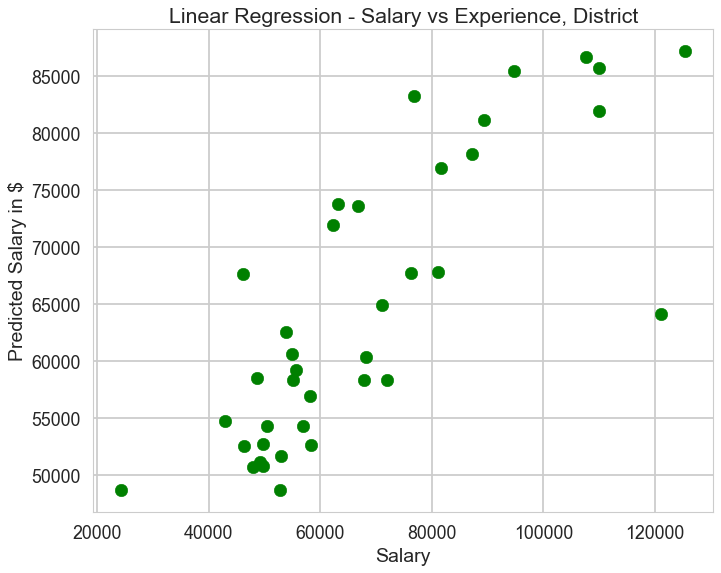

In [329]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(y_mul_test, pred_mul, c='g')
#plt.scatter(X_train, y_train)
#plt.plot(X_dis_test, pred_mul, c='r')
plt.title("Linear Regression - Salary vs Experience, District")
plt.xlabel("Salary")
plt.ylabel("Predicted Salary in $")
plt.show()

# mse = sklearn.metrics.mean_squared_error(y_mul_test, pred_mul)
# print(mse)

# print('R-Square:',metrics.explained_variance_score(y_mul_test,pred_mul))

### Calculate Coefficients, Mean Squared error and Variance score - Salary Vs District, Experience

In [330]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: ', lRegressor_mul.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_mul_test, pred_mul))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_mul_test, pred_mul))

Coefficients:  [  44.88393654 1889.47501351]
Mean squared error: 243111794.33
Variance score: 0.55
